In [1]:
import numpy as np
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

Populating the interactive namespace from numpy and matplotlib


## Dataset: IBM stock values from 1962 to 2018

In [2]:
series = pd.Series.from_csv('ibm_daily_1962-2018.csv', sep='\t',header=0)

/Users/abhishek/anaconda3/envs/python2/lib/python2.7/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


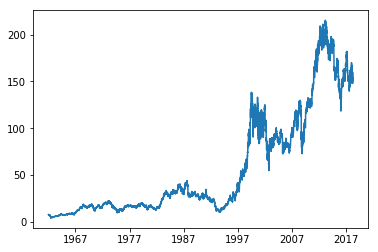

In [3]:
plot(series)

In [4]:
len(series)

14168

## Split the time series into months (676 series)
and plot normalized time series

/Users/abhishek/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


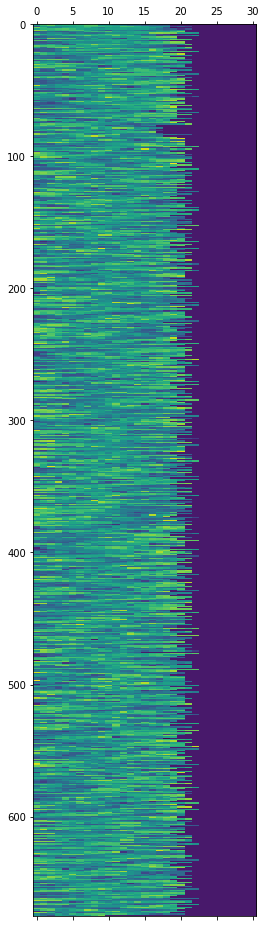

In [5]:
from pandas import TimeGrouper
from pandas import DataFrame
groups = series.groupby(TimeGrouper('M'))

mm2 = DataFrame()
for name, group in groups:
    norm_values = (group.values - mean(group.values)) / std(group.values)
    # Padding performed to have series of same length -- important only for plotting the matrix
    pad_values = np.pad(norm_values,(0,31-len(norm_values)),'constant',constant_values=-3)
    mm2["%s-%s" % (name.year,name.month)] = pad_values
matshow(mm2.T, interpolation=None, aspect='auto')

In [6]:
a = mm2['1962-1']
b = mm2['1962-2']
c = mm2['1962-3']

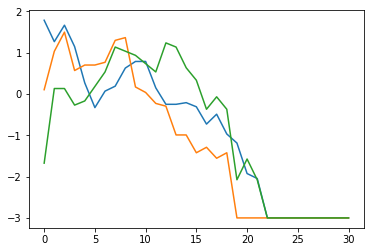

In [7]:
plot(a)
plot(b)
plot(c)

In [8]:
transposed_mm2 = mm2.T
transposed_mm2.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1962-1,1.781561,1.263226,1.661944,1.143609,0.266419,-0.331665,0.067060,0.186676,0.625269,0.784759,...,-2.046172,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
1962-2,0.101219,1.029650,1.493870,0.565439,0.698069,0.698069,0.764389,1.294920,1.361240,0.167539,...,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
1962-3,-1.675679,0.129954,0.129954,-0.271300,-0.170982,0.180105,0.531192,1.133065,1.032763,0.932446,...,-2.076917,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
1962-4,1.732179,0.940024,-0.380237,-0.327424,0.517544,0.464731,0.517544,0.728780,-0.010562,-0.591473,...,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
1962-5,0.331695,0.850906,0.932031,1.248424,1.370114,1.000988,0.510175,0.234344,0.299246,0.072093,...,-1.745139,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0


In [9]:
transposed_mm2.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0
mean,-0.069251,-0.042395,-0.008298,-0.036782,-0.077351,-0.090812,-0.069643,-0.043155,-0.008635,0.031330,...,-1.898990,-2.715043,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
std,1.329370,1.222245,1.115069,1.007063,0.983266,0.916155,0.892110,0.820153,0.819038,0.839347,...,1.635747,0.947877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-3.187250,-2.648811,-2.526121,-2.164481,-2.510520,-2.442554,-2.362745,-2.184987,-3.057134,-2.293721,...,-3.000000,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
25%,-1.191943,-1.156747,-1.023605,-0.873745,-0.877965,-0.835940,-0.792866,-0.647759,-0.594214,-0.571444,...,-3.000000,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
50%,-0.069824,-0.077891,-0.020494,-0.091407,-0.091243,-0.126078,-0.114364,-0.067909,-0.062792,0.019089,...,-3.000000,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
75%,1.023839,1.060470,0.971623,0.830251,0.724219,0.627706,0.694822,0.561744,0.576135,0.594015,...,-0.779399,-3.000000,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
max,3.132168,2.496044,2.786772,2.290125,2.430206,2.349714,2.680295,2.135375,2.527096,2.911753,...,2.458811,2.504606,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0


In [10]:
new_t_mm2 = transposed_mm2.drop(transposed_mm2.columns[[22, 23, 24, 25, 26, 27, 28, 29, 30]], axis=1)

In [11]:
new_t_mm2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1962-1,1.781561,1.263226,1.661944,1.143609,0.266419,-0.331665,0.067060,0.186676,0.625269,0.784759,...,-0.251922,-0.251922,-0.212048,-0.311730,-0.730383,-0.491155,-0.969616,-1.188915,-1.926555,-2.046172
1962-2,0.101219,1.029650,1.493870,0.565439,0.698069,0.698069,0.764389,1.294920,1.361240,0.167539,...,-0.296681,-0.993007,-0.993007,-1.424062,-1.291432,-1.556702,-1.424062,-3.000000,-3.000000,-3.000000
1962-3,-1.675679,0.129954,0.129954,-0.271300,-0.170982,0.180105,0.531192,1.133065,1.032763,0.932446,...,1.233382,1.133065,0.631509,0.330573,-0.371602,-0.070665,-0.371602,-2.076917,-1.575362,-2.076917
1962-4,1.732179,0.940024,-0.380237,-0.327424,0.517544,0.464731,0.517544,0.728780,-0.010562,-0.591473,...,0.411918,0.306300,0.306300,0.253487,0.200682,-0.433042,-1.753303,-3.231995,-3.000000,-3.000000
1962-5,0.331695,0.850906,0.932031,1.248424,1.370114,1.000988,0.510175,0.234344,0.299246,0.072093,...,0.429047,0.169444,0.250570,0.185668,-0.284864,-0.925762,-1.485534,-1.517984,-2.540178,-1.745139


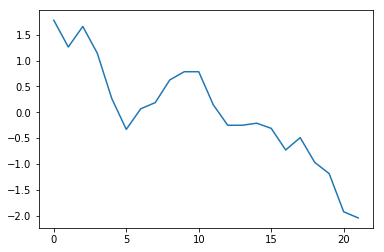

In [12]:
matrix = new_t_mm2.as_matrix()
first = matrix[0]
plot(first)

In [13]:
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize

discretized_time_series = list()

for index, row in new_t_mm2.iterrows():
    x = ts_to_string(znorm(row), cuts_for_asize(6))
    discretized_time_series.append(x)

In [14]:
discretized_time_series

['ffffdcddeeedccccbbaaaa',
 'dffeeeeffddddccbbbbaaa',
 'addccdeffeeeffedcccaaa',
 'fecceeeedcddeeeddcaaaa',
 'deefffedddddddddcbaaaa',
 'ffeefffecbacccbbbcbcda',
 'abbaabcefefdddeecddefa',
 'caccbabaabcccdddffffdd',
 'feeededeeeffedcbcaaaaa',
 'dbcceeefeeefefdbbaaaab',
 'abbccbcdcddedddfffffaa',
 'edffffccebcaaddbeeddaa',
 'aaaaabccceededeeeeffff',
 'ffeeeeeeeeeeeccbabaaaa',
 'aabaccccccdeddedeefffa',
 'aaaabdddcddccceefffffa',
 'bcecaaeeffefedbdcbbabf',
 'fffeeedeeddddcccbbaaaa',
 'dafffdfecbcdcbbaaaacdf',
 'aaaababcdffffedefeebcc',
 'abbcfeeeeeddbdedfebbaa',
 'aaaabcbbbbddffffeeeffe',
 'ffedeeeefeedccabcdaaaa',
 'efedddcbbaabcccccdfffa',
 'aaaaaaccdeffffeefedcbc',
 'cccbbbccdeeeeeeefffaaa',
 'baaabbbcdffeeddceefffa',
 'fffffcbcfdcbbbadebbaba',
 'abcccccccccddeffffeeaa',
 'ecdbaaababceefeefeffed',
 'deeffffeecdddccbbaaaaa',
 'ffdeeeedeeeeecbcbaaaba',
 'effffecbbaacdbbbcdeeea',
 'fffdcdeedbbdfdccbbaaab',
 'dcccccccdfffddfeccbaaa',
 'caaeffaabecbceffecedbc',
 'baabbccccdeeeeeffeffaa',
 

In [15]:
with open("literal_timeseries.txt", "w") as output:
    for i in discretized_time_series:
        output.write(i)
        output.write('\n')

In [16]:
preprocessed_list = list()
#my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10}
#my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8}
my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6}

for dts in discretized_time_series:
    dts_l = list(dts)
    p_dts = list()
    dts_nl = [my_dict[key] for key in dts_l]
    for i in dts_nl:
        p_dts.append(i)
        p_dts.append(' ')
        p_dts.append(-1)
        p_dts.append(' ')
    p_dts.append(-2)
    preprocessed_list.append(p_dts)

In [17]:
len(preprocessed_list)

676

In [18]:
x = preprocessed_list[0]
len(x)

89

In [19]:
with open("numerical_timeseries.txt", "w") as output:
    for i in preprocessed_list:
        for j in i:
            output.write(str(j))
        output.write('\n')

In [20]:
#my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10}
#my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8}
my_dict = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6}
dts = discretized_time_series[0]
dts_l = list(dts)
dts_l

['f',
 'f',
 'f',
 'f',
 'd',
 'c',
 'd',
 'd',
 'e',
 'e',
 'e',
 'd',
 'c',
 'c',
 'c',
 'c',
 'b',
 'b',
 'a',
 'a',
 'a',
 'a']

In [21]:
lstval = [my_dict[key] for key in dts_l]
lstval

[6, 6, 6, 6, 4, 3, 4, 4, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1]